## Anomaly Detection
Based on Andrew Ng's lectures

The approach for annomaly detection is:

#### 1 - Fit multivariate Gaussian Distribution on Data 
#### 2 - Find a threshold for probability using the F1-score by sweeping through various threshold candidates. 

$$F1 = 2*(Precision * Recall)/(Precision + Recall)$$
$$Precision = \frac{True Positives}{Predicted Positives} $$
$$Recall = \frac{True Positives}{Actual Positives}$$

#### 3 - If the datapoint is below threshold it is considered an anomaly.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

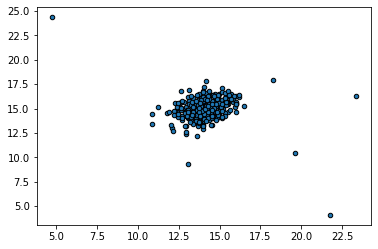

In [2]:
rawdata = sio.loadmat('data1ex8')
# print(rawdata)
X = rawdata['X']
Xval = rawdata['Xval']
Yval = rawdata['yval']
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', s=20)

In [64]:
def MultiVarNormal(X,Mu,Sig):
    # Returns the multivariate Gaussian distribution on X.
    #Test if sigma is positive definite
    k = Mu.shape[0]
#     print('K:',k)
    Xn = (X - Mu.T)
#     print(Xn.shape)
    # p = A*e^(-1/2 (x-mu)^T sig^-1 (x-mu)
    A = 1/np.sqrt((2*np.pi)**k * np.linalg.det(Sig))
    p = A*np.exp(np.sum(-0.5*(Xn @ np.linalg.inv(Sig)) * Xn,axis=1))
    return p.flatten()
    
mean = np.mean(X, axis=0).reshape(-1,1)
cov = np.cov(X, rowvar=0)
# print(mean.shape)
# print(cov)
Xtest = np.array([[14.11222578,14.99771051]])
p = MultiVarNormal(Xtest,mean,cov)
print(p)

[0.0903659]


[23.33986753 24.35040725] [4.75261282 4.12623222]
(2500, 2)


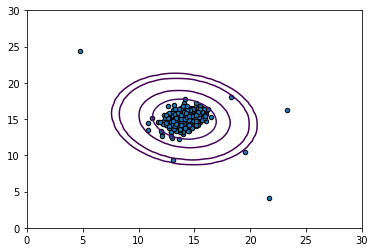

In [65]:
# Visualize the Gaussian Fit
Xmax, Xmin = np.max(X,axis=0), np.min(X,axis=0)
print(Xmax, Xmin)
meshNum = 50
x1 = np.linspace(Xmin[0],Xmax[0],meshNum)
x2 = np.linspace(Xmin[1],Xmax[1],meshNum)
xx1, xx2 = np.meshgrid(x1,x2)
Xarr = np.array([xx1.flatten(),xx2.flatten()]).T
print(Xarr.shape)
Z = MultiVarNormal(Xarr,mean,cov).reshape(meshNum,meshNum)
plt.axis([0,30,0,30])
plt.contour(xx1,xx2,Z,[0,1e-6,1e-5,1e-3,1e-2,1e-1, 0.2])
plt.scatter(X[:, 0], X[:, 1], edgecolor='k', s=20)

In [66]:
# Find outliers using a CrossValidation Set

pVal = MultiVarNormal(Xval,mean,cov)
# print(pVal)

# Select Threshold

def SelectThreshold(yval,pVal):
    bestEps = 0
    bestF1 = 0
    F1 = 0
    Candidates = np.linspace(np.min(pVal),np.max(pVal),1000)                   
    for eps in Candidates:
        pred = (pVal < eps).reshape(-1,1)
        
        PredPositives = np.count_nonzero(pred)
        ActualPositives = np.count_nonzero(yval)

        TruePositives = np.sum(np.logical_and(pred==1, yval==1))
        Recall = float(TruePositives) / ActualPositives
        if PredPositives == 0:
            Precision = 0
        else:
            Precision = float(TruePositives) / PredPositives  

        if Precision == 0 and Recall == 0:
            F1 = 0
        else:
            F1 = 2*(Precision * Recall)/(Precision + Recall)
        
        if F1 > bestF1:
            bestF1 = F1
            bestEps = eps
            
    return bestEps,bestF1
        
bestEps, bestF1 = SelectThreshold(Yval,pVal)
print("Epsilon:",bestEps)
print("Best F1:", bestF1)
print("# of outliers:", np.sum(p<bestEps))


Epsilon: 9.045285962118499e-05
Best F1: 0.8750000000000001
# of outliers: 0


## High Dimensional Dataset

In [60]:
rawdata = sio.loadmat('data2ex8')
# print(rawdata)
X = rawdata['X']
Xval = rawdata['Xval']
Yval = rawdata['yval']

mean2 = np.mean(X, axis=0).reshape(-1,1)
cov2 = np.cov(X, rowvar=0)
p = MultiVarNormal(X,mean2,cov2)
pVal2 = MultiVarNormal(Xval,mean2,cov2)

bestEps, bestF1 = SelectThreshold(Yval,pVal2)
print("Epsilon:",bestEps)
print("Best F1:", bestF1)
print("# of outliers:", np.sum(p<bestEps))

Epsilon: 1.7482478875565086e-18
Best F1: 0.5517241379310345
# of outliers: 122
